## Code submitted by: CHIRAG VERMA

### Prob 1e

Given:  for $ p > 0$
        $$\dot{x_1} = x_1(1-x_2)$$
        $$\dot{x_2} = x_2(x_1 - p)$$
        
To compare: the numerically measured period of a simulated trajectory with the analytically calculated period


Analytical period is $\frac{2\pi}{\sqrt{p}}$

In [1]:
# Importing libraries

from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Using p_ as a global variable for input to the defined functions
p_ = 2

# Defining the L-V function
def LotkaVolterra(t, x, p):
    dx1 = x[0]*(1-x[1])
    dx2 = x[1]*(x[0] - p)
    return [dx1, dx2]

# Defining the function that would capture the event when x_1 is p_
# This would help in calculating the time period
def my_event(t, x, p = p_):
    return x[0] - p


Time period of the orbit is:  4.64 <time units>
Analytically computed time period of the orbit is:  4.44 <time units>


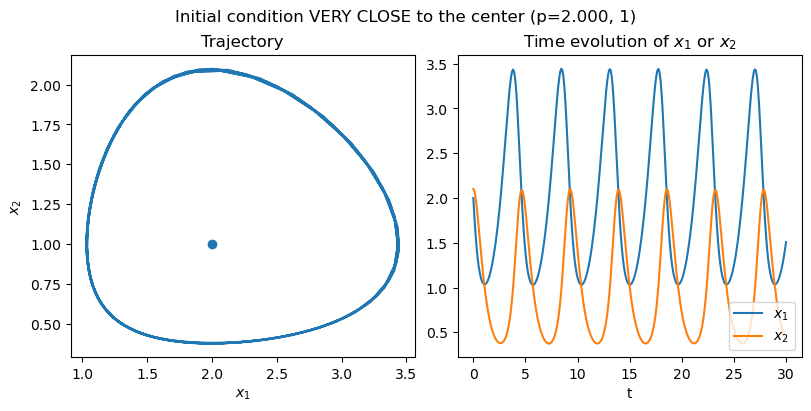

In [3]:
# Initial condition very close to the center

# A perturbation parameter
init = 0.1

# Solving the system
sol = solve_ivp(LotkaVolterra, [0, 30], [p_, p_ + init], args = (p_,), dense_output=True, events = my_event )

# Defining and initializing variables for plotting purposes
t = np.linspace(0, 30, 300)
z = sol.sol(t)

fig, ax = plt.subplots(1,2, figsize=(8,4),  constrained_layout = True)
fig.suptitle("Initial condition VERY CLOSE to the center (p=%.3f, 1)" %p_)

# Plotting x_1 and x_2 as functions of t
ax[1].plot(t, z.T[:, 0])
ax[1].plot(t, z.T[:, 1])
ax[1].set_xlabel('t')
ax[1].legend([r'$x_1$', r'$x_2$'], loc = "lower right")
ax[1].set_title("Time evolution of $x_1$ or $x_2$")

# Plotting x_1 vs x_2
ax[0].plot(z.T[:, 0], z.T[:, 1])
ax[0].scatter(p_, 1)
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title("Trajectory")

print("Time period of the orbit is: ", np.round(sol.t_events[0][2] - sol.t_events[0][0], 2), "<time units>")
print("Analytically computed time period of the orbit is: ", np.round((2*np.pi)/np.sqrt(p_), 2), "<time units>")


Numerically computed time period of the orbit is:  6.15 <time units>
Analytically computed time period of the orbit is:  4.44 <time units>


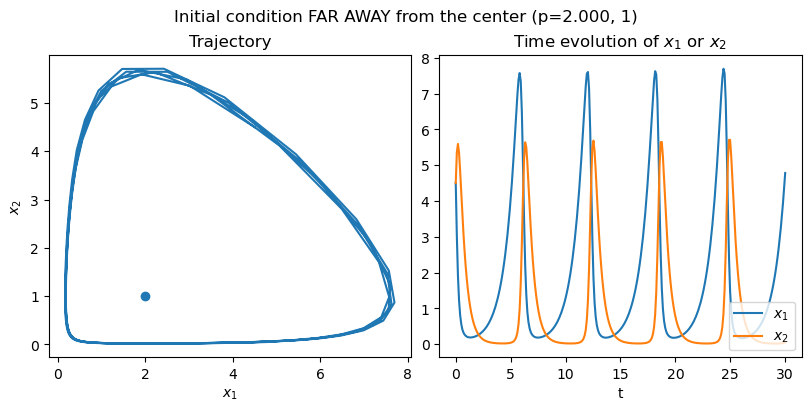

In [4]:
# Initial condition very away from the center

init = 2.5
sol = solve_ivp(LotkaVolterra, [0, 30], [p_+init, p_ + init], args = (p_,), dense_output=True, events = my_event )

t = np.linspace(0, 30, 300)
z = sol.sol(t)

fig, ax = plt.subplots(1,2, figsize=(8,4),  constrained_layout = True)
fig.suptitle("Initial condition FAR AWAY from the center (p=%.3f, 1)" %p_)

ax[1].plot(t, z.T[:, 0])
ax[1].plot(t, z.T[:, 1])
ax[1].set_xlabel('t')
ax[1].legend([r'$x_1$', r'$x_2$'], loc = "lower right")
ax[1].set_title("Time evolution of $x_1$ or $x_2$")

ax[0].plot(z.T[:, 0], z.T[:, 1])
ax[0].scatter(p_, 1)
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title("Trajectory")

print("Numerically computed time period of the orbit is: ", np.round(sol.t_events[0][2] - sol.t_events[0][0], 2), "<time units>")
print("Analytically computed time period of the orbit is: ", np.round((2*np.pi)/np.sqrt(p_), 2), "<time units>")